## Ex. 3.3: Importance Sampling for MC Integration

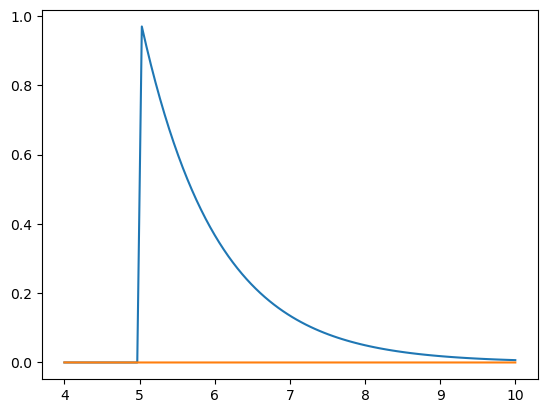

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))
plt.show()

The true probability of the extreme event, $\mathrm{P} (X>5)$ is extremely small.

(0.0, 1e-05)

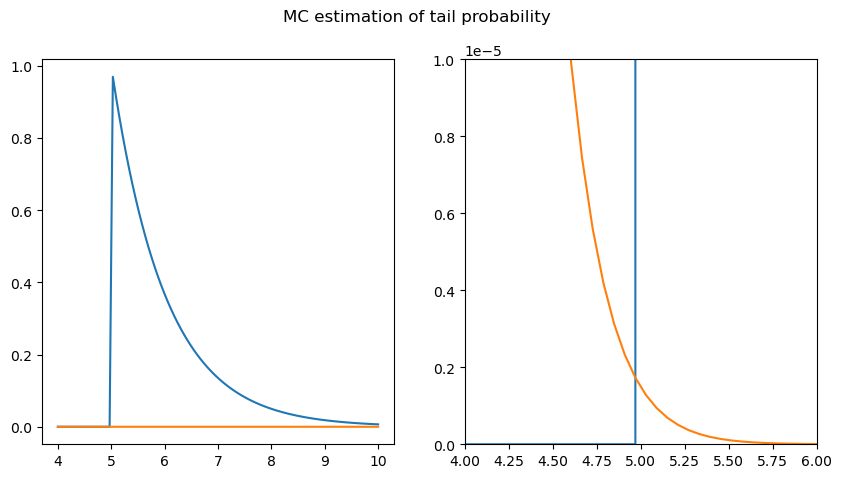

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('MC estimation of tail probability')
ax1.plot(x, stats.expon(5).pdf(x))
ax1.plot(x, stats.norm().pdf(x))
# zoom
ax2.plot(x, stats.expon(5).pdf(x))
ax2.plot(x, stats.norm().pdf(x))
ax2.set_xlim(4, 6)
ax2.set_ylim(0,1.e-5)

In [3]:
P_true = 1 - stats.norm().cdf(5)
#P_true
print(f'True probability = {P_true:.6g}')

True probability = 2.86652e-07


This means that approximately 3 samples out of 10,000,000 from $\mathcal{N}(0,1)$ would be accepted.

### Ordinary MC

First try ordinary MC.

In [4]:
np.random.seed(24)

N= 10000
y = stats.norm().rvs(N)
P_mc = 1.0/N * np.sum(y > 5)
# estimate and relative error
#P_mc, np.abs(P_mc - P_true)/P_true
print(f'Estimate of I = {P_mc:.6g}')
print(f'Estimate relative error = {np.abs(P_mc- P_true)/P_true:.4f}')

Estimate of I = 0
Estimate relative error = 1.0000


The result is completely off. Now we apply importance sampling with the truncated exponential.

In [5]:
np.random.seed(1)

N = 10000
y = stats.expon(loc=5).rvs(N)
P_is = 1.0/N * np.sum(stats.norm().pdf(y)/stats.expon(loc=5).pdf(y))
# estimate integral and relative error
#P_is, np.abs(P_is- P_true)/P_true
print(f'Estimate of I = {P_is:.6g}')
print(f'Estimate relative error = {np.abs(P_is- P_true)/P_true:.4f}')

Estimate of I = 2.8796e-07
Estimate relative error = 0.0046


The result is excellent, with a relative error of only $0.4\%.$ This will vary with different seeds, but will usually be less than approximately $2\%.$ 